In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trip_df = pd.read_csv("../data/raw/trips.csv")
cust_df = pd.read_csv("../data/raw/customers.csv")
cust_act_df = pd.read_csv("../data/raw/customer_activity.csv")
promo_df = pd.read_csv("../data/raw/promotions.csv")
promo_redem_df = pd.read_csv("../data/raw/promo_redemptions.csv")

# Data Quality Check

#### Trips Data Quality Check

In [3]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127615 entries, 0 to 127614
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trip_id           127615 non-null  object 
 1   customer_id       127615 non-null  object 
 2   city              127615 non-null  object 
 3   trip_date         127615 non-null  object 
 4   trip_status       127615 non-null  object 
 5   distance_km       123787 non-null  float64
 6   duration_min      123787 non-null  float64
 7   fare_amount       127615 non-null  float64
 8   platform_revenue  127615 non-null  float64
 9   driver_payout     127615 non-null  float64
 10  promo_used        127615 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 10.7+ MB


In [4]:
trip_df["trip_date"] = pd.to_datetime(trip_df["trip_date"])

In [5]:
trip_df.isnull().sum()

trip_id                0
customer_id            0
city                   0
trip_date              0
trip_status            0
distance_km         3828
duration_min        3828
fare_amount            0
platform_revenue       0
driver_payout          0
promo_used             0
dtype: int64

In [6]:
trip_df.describe()

,trip_date,distance_km,duration_min,fare_amount,platform_revenue,driver_payout,promo_used
count,127615,123787.000000,123787.000000,127615.000000,127615.000000,127615.000000,127615.000000
mean,2025-08-27 09:34:11.674176256,7.002117,25.025386,12.999141,3.249807,9.749336,0.148830
min,2022-12-23 00:00:00,1.000000,5.000000,0.800000,0.200000,0.600000,0.000000
25%,2024-11-10 00:00:00,4.020000,15.100000,7.640000,1.910000,5.730000,0.000000
50%,2025-08-28 00:00:00,7.000000,25.000000,12.650000,3.160000,9.490000,0.000000
75%,2026-06-14 00:00:00,10.000000,35.000000,17.620000,4.400000,13.220000,0.000000
max,2028-05-05 00:00:00,13.000000,45.000000,41.990000,10.500000,31.490000,1.000000
std,NaN,3.461267,11.530705,6.932037,1.733008,5.199030,0.355923


In [7]:
#plt.figure(figsize=(25,12))
#sns.heatmap(trip_df.isnull(), annot=True)
#plt.title("Trips Heatmap with Missing Value Column Labels")
#plt.tight_layout()
#plt.show()

In [8]:
trip_df["distance_km"] = trip_df["distance_km"].fillna(trip_df["distance_km"].median())
trip_df["duration_min"] = trip_df["duration_min"].fillna(trip_df["duration_min"].median())

In [9]:
numerical_cols = trip_df.select_dtypes(include="number")
numerical_cols.columns

Index(['distance_km', 'duration_min', 'fare_amount', 'platform_revenue',
       'driver_payout', 'promo_used'],
      dtype='object')

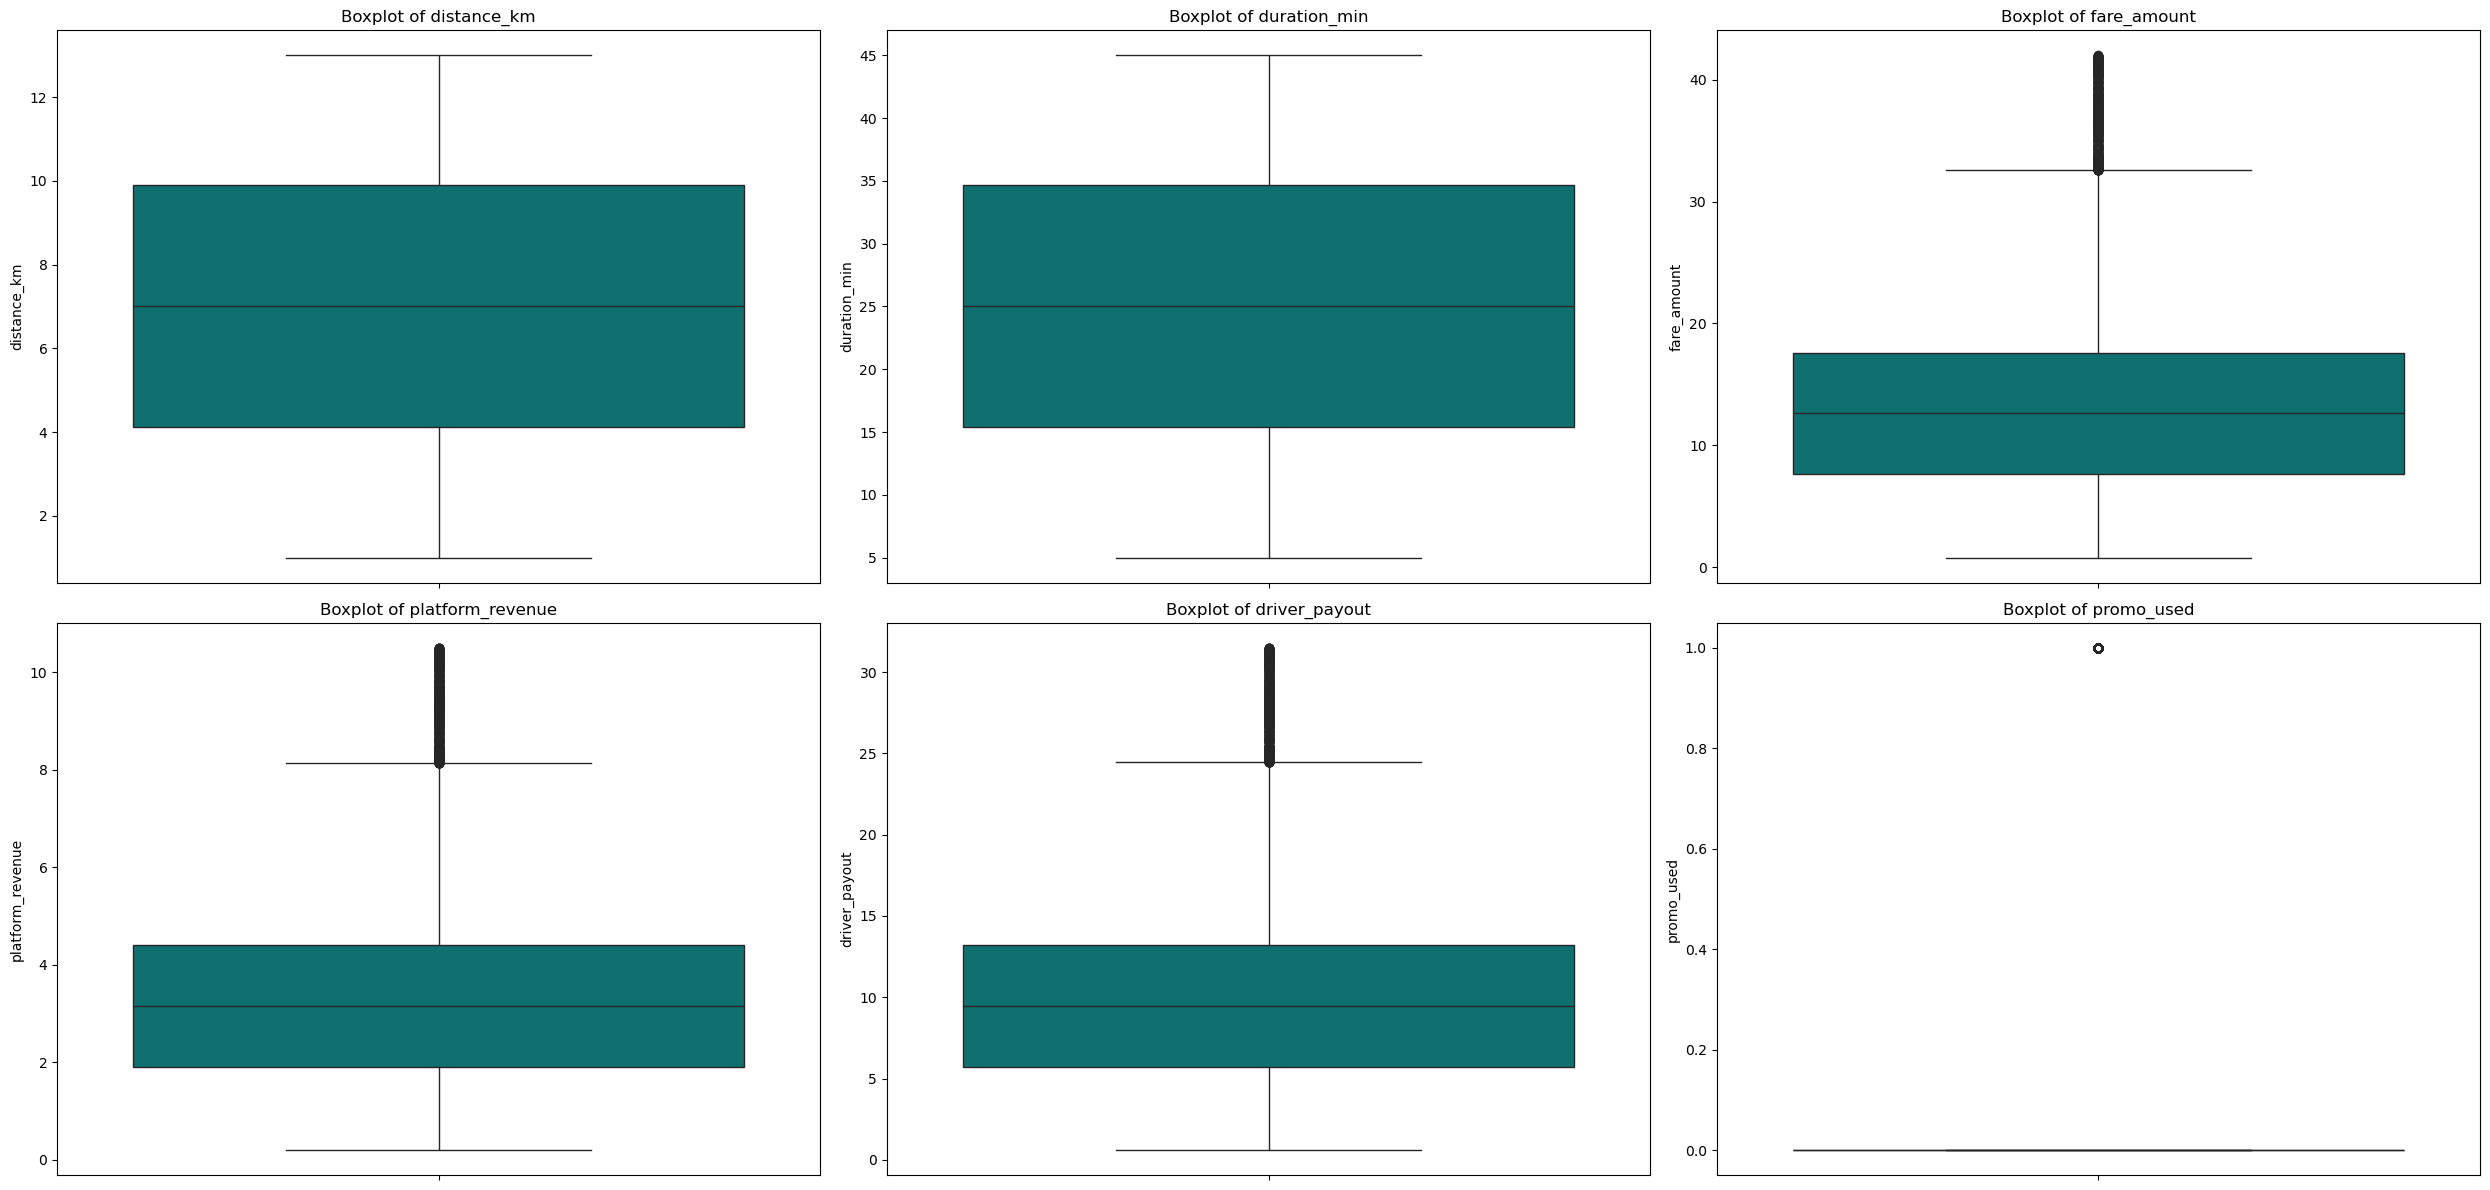

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,12))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.boxplot(trip_df[col], ax=ax[idx], color="teal")
    ax[idx].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

##### Handle Outliers

In [11]:
clip_cols = [
    "fare_amount",
    "driver_payout",
    "platform_revenue"
]


In [12]:
for col in clip_cols:
    lower = trip_df[col].quantile(0.05)
    upper = trip_df[col].quantile(0.95)
    
    trip_df[col] = trip_df[col].clip(lower=lower, upper=upper)


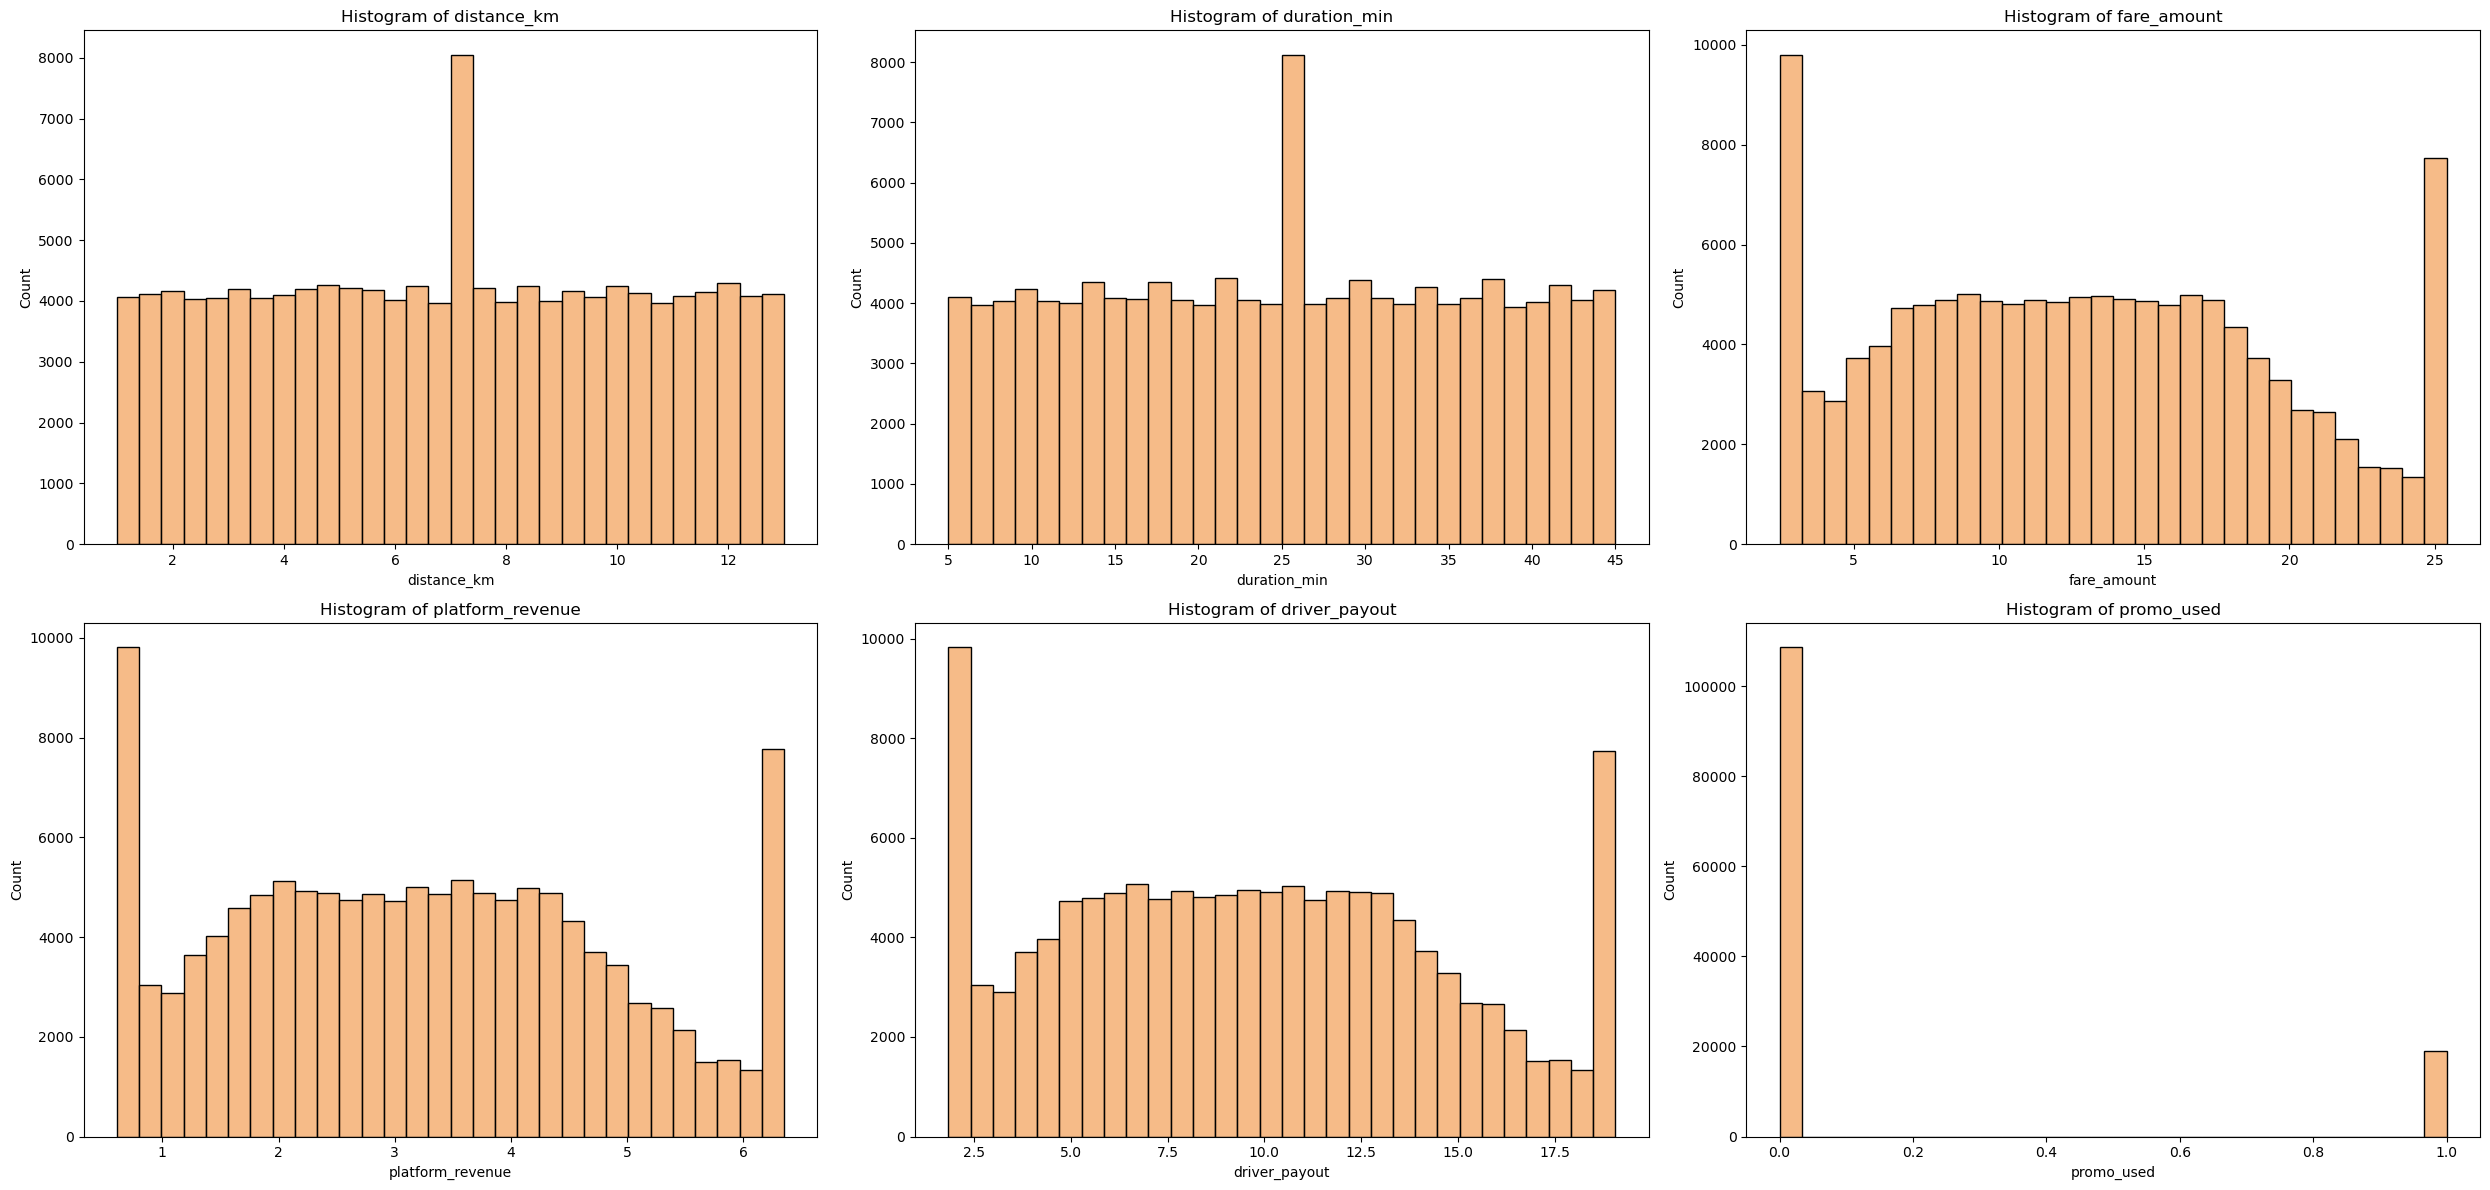

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,12))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.histplot(trip_df[col], ax=ax[idx], color="Sandybrown", bins=30)
    ax[idx].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

#### Customer Data Quality Check

In [14]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           3000 non-null   object 
 1   city                  3000 non-null   object 
 2   signup_date           3000 non-null   object 
 3   age                   3000 non-null   int64  
 4   gender                3000 non-null   object 
 5   total_trips           3000 non-null   int64  
 6   cancelled_trips       3000 non-null   int64  
 7   days_since_last_trip  3000 non-null   int64  
 8   churned               3000 non-null   int64  
 9   engagement_score      3000 non-null   float64
 10  loyalty_score         3000 non-null   float64
 11  persona               3000 non-null   object 
 12  signup_channel        3000 non-null   object 
 13  income_level          3000 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 328.3+ KB


In [15]:
cust_df["signup_date"] = pd.to_datetime(cust_df["signup_date"])

In [16]:
cust_df.describe()

,signup_date,age,total_trips,cancelled_trips,days_since_last_trip,churned,engagement_score,loyalty_score
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2024-05-30 22:06:14.400000,43.495000,42.538333,3.136667,21.240667,0.182333,0.999209,0.860609
min,2022-12-21 00:00:00,18.000000,1.000000,0.000000,0.000000,0.000000,0.857000,0.558000
25%,2023-09-04 00:00:00,31.000000,32.000000,1.000000,6.000000,0.000000,1.000000,0.800000
50%,2024-05-19 12:00:00,44.000000,41.000000,3.000000,15.000000,0.000000,1.000000,0.856000
75%,2025-03-01 00:00:00,57.000000,52.000000,5.000000,30.000000,0.000000,1.000000,0.925000
max,2025-11-20 00:00:00,68.000000,99.000000,15.000000,167.000000,1.000000,1.000000,1.000000
std,NaN,14.664981,15.126537,2.538005,21.798298,0.386183,0.006998,0.085925


In [17]:
numerical_cols = cust_df.select_dtypes(include="number")
numerical_cols.columns

Index(['age', 'total_trips', 'cancelled_trips', 'days_since_last_trip',
       'churned', 'engagement_score', 'loyalty_score'],
      dtype='object')

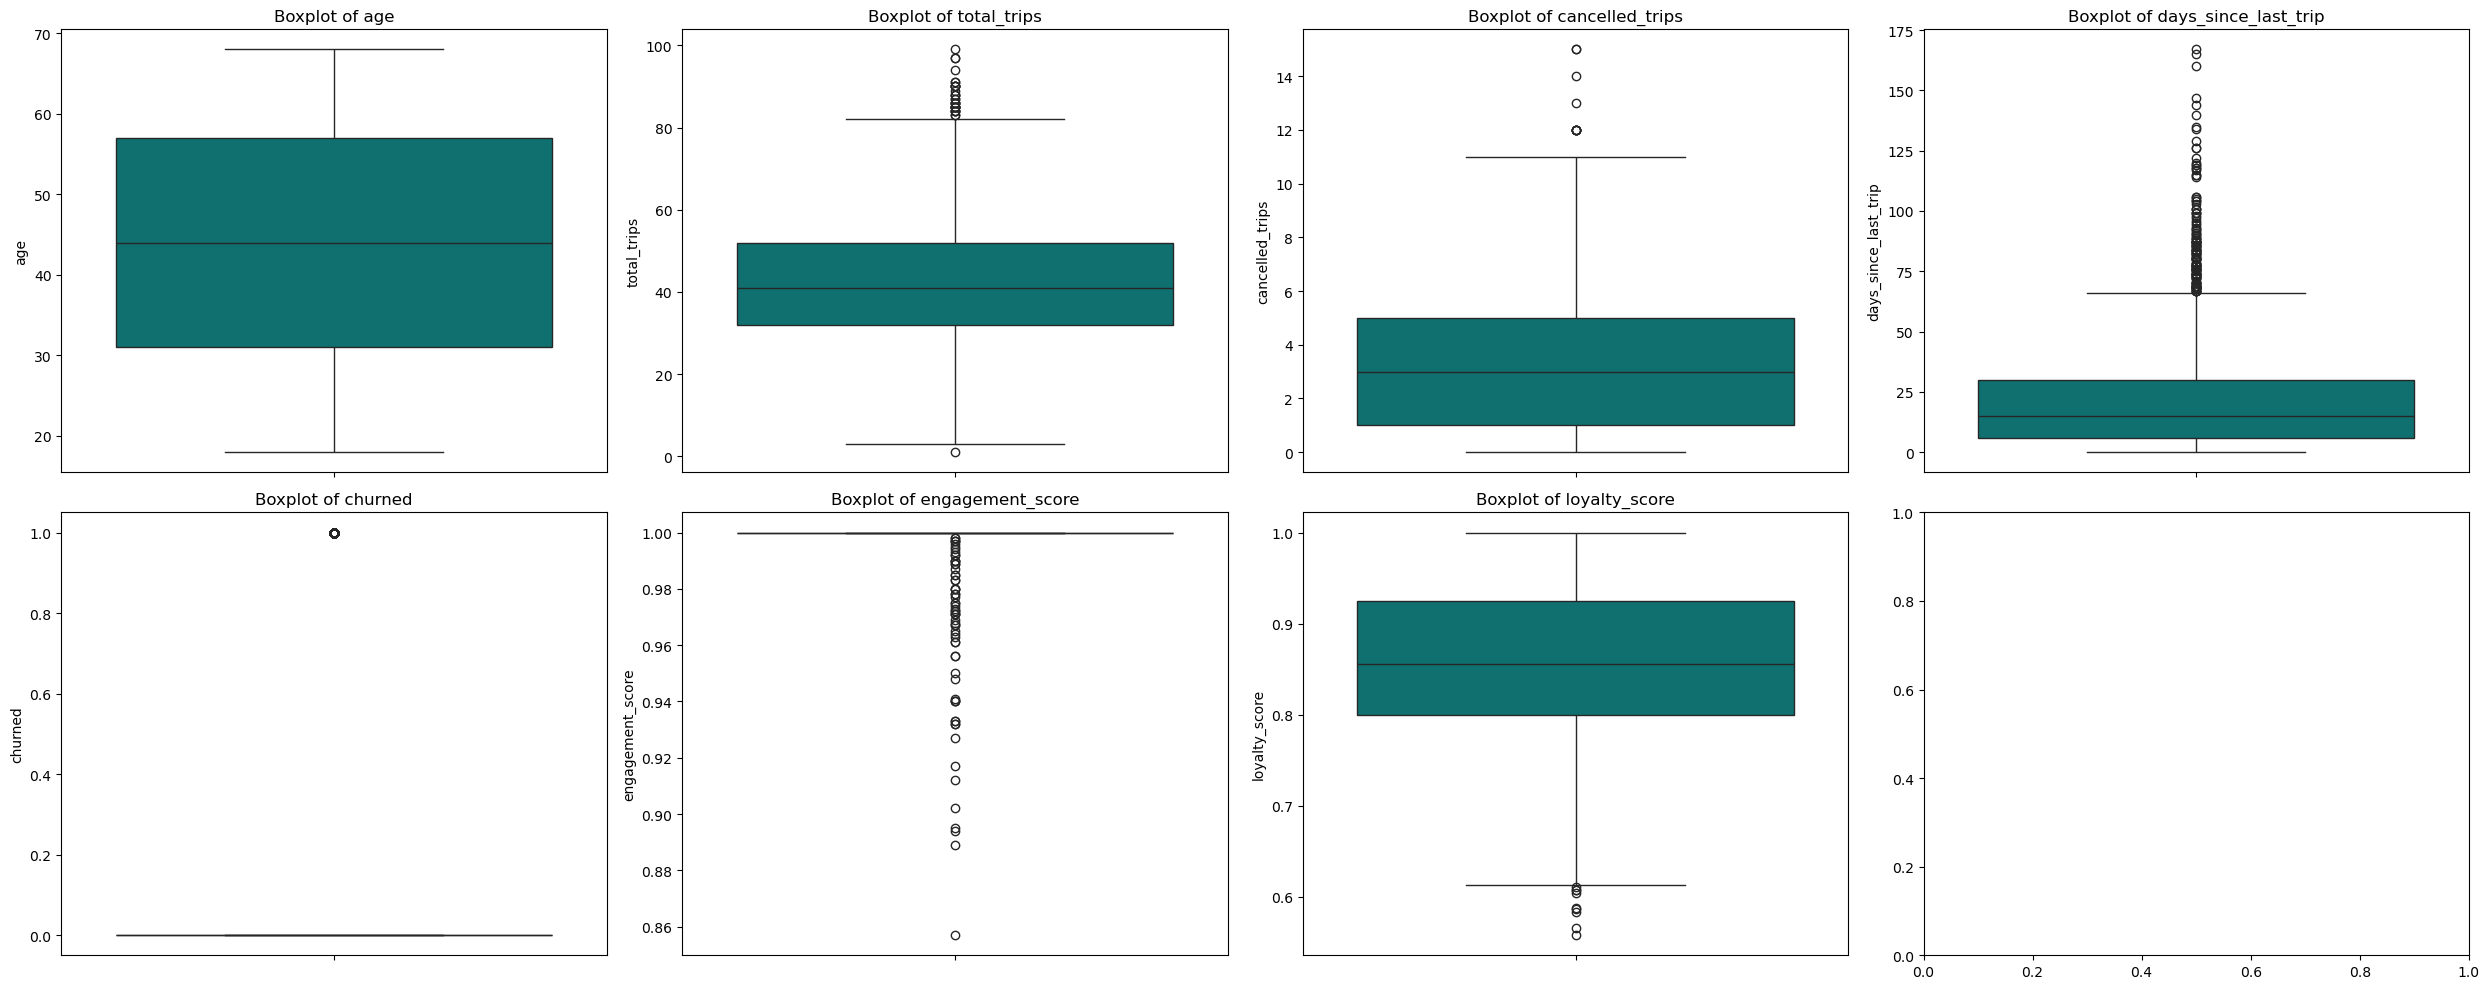

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.boxplot(cust_df[col], ax=ax[idx], color="teal")
    ax[idx].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

##### Handling Outliers

In [19]:
clip_cols = [
    "total_trips",
    "days_since_last_trip",
    "engagement_score",
    "loyalty_score",
    "cancelled_trips"
]

In [20]:
for col in clip_cols:
    lower = cust_df[col].quantile(0.05)
    upper = cust_df[col].quantile(0.95)
    
    cust_df[col] = cust_df[col].clip(lower=lower, upper=upper)


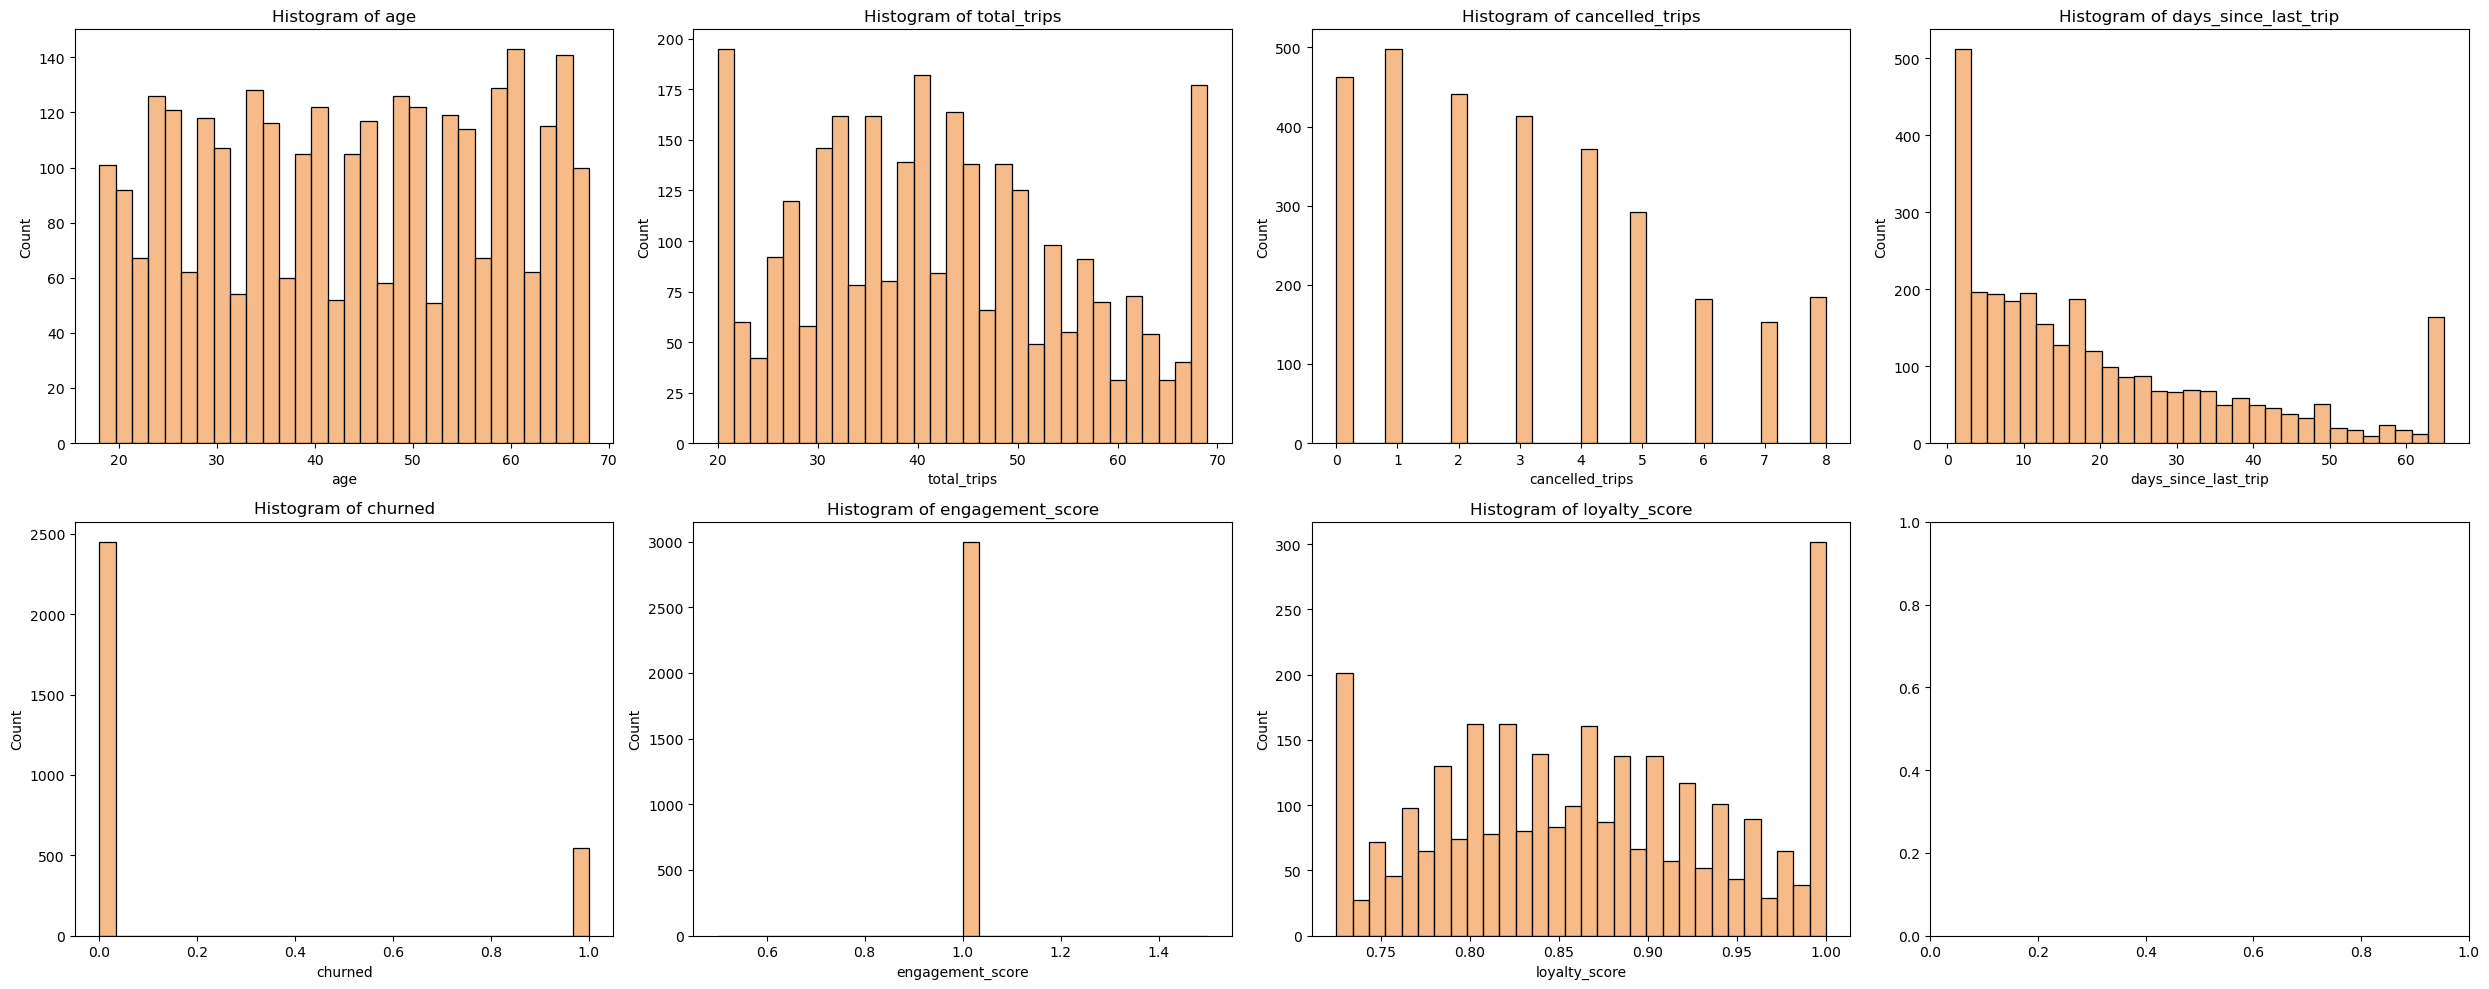

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(numerical_cols):
    sns.histplot(cust_df[col], ax=ax[idx], color="Sandybrown", bins=30)
    ax[idx].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

#### Customer Activity Data Quality Check

In [22]:
cust_act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493347 entries, 0 to 493346
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  493347 non-null  object
 1   session_id   493347 non-null  object
 2   event_date   493347 non-null  object
 3   event_type   493347 non-null  object
dtypes: object(4)
memory usage: 15.1+ MB


In [23]:
cust_act_df["event_date"] = pd.to_datetime(cust_act_df["event_date"])

In [24]:
cust_act_df.describe()

,event_date
count,493347
mean,2025-11-09 14:31:05.006172160
min,2025-08-24 00:00:00
25%,2025-10-21 00:00:00
50%,2025-11-14 00:00:00
75%,2025-12-03 00:00:00
max,2025-12-21 00:00:00


#### Promotion Data Quality Check

In [25]:
promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   promo_id        40 non-null     object 
 1   promo_type      40 non-null     object 
 2   discount_value  40 non-null     float64
 3   start_date      40 non-null     object 
 4   end_date        40 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.7+ KB


In [26]:
promo_df["start_date"] = pd.to_datetime(promo_df["start_date"])
promo_df["end_date"] = pd.to_datetime(promo_df["end_date"])

In [27]:
promo_df.describe()

,discount_value,start_date,end_date
count,40.000000,40,40
mean,17.291000,2025-02-22 21:36:00,2025-03-24 10:12:00
min,5.530000,2024-01-01 00:00:00,2024-01-16 00:00:00
25%,11.245000,2024-08-29 12:00:00,2024-10-12 00:00:00
50%,17.920000,2025-03-30 00:00:00,2025-04-21 12:00:00
75%,22.602500,2025-09-16 12:00:00,2025-10-15 12:00:00
max,29.860000,2025-12-18 00:00:00,2026-02-06 00:00:00
std,7.057469,NaN,NaN


In [28]:
numerical_cols = promo_df.select_dtypes(include="number")
numerical_cols.columns

Index(['discount_value'], dtype='object')

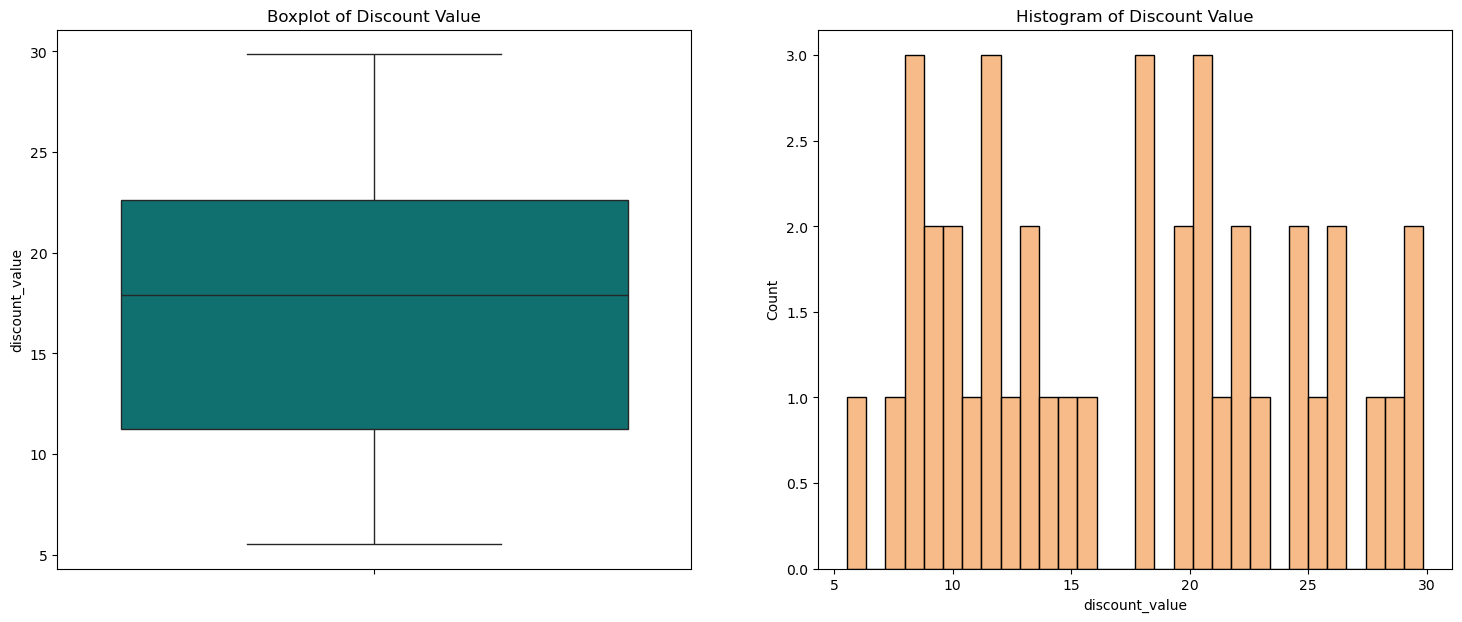

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,7))
ax=ax.flatten()

sns.boxplot(promo_df["discount_value"], color="teal", ax=ax[0])
ax[0].set_title("Boxplot of Discount Value")

sns.histplot(promo_df["discount_value"], color="Sandybrown", bins=30, ax=ax[1])
ax[1].set_title("Histogram of Discount Value")
plt.show()

#### Promo Redemptions Quality Check

In [30]:
promo_redem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11396 entries, 0 to 11395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trip_id        11396 non-null  object 
 1   customer_id    11396 non-null  object 
 2   promo_id       11396 non-null  object 
 3   redeemed_date  11396 non-null  object 
 4   promo_cost     11396 non-null  float64
dtypes: float64(1), object(4)
memory usage: 445.3+ KB


In [31]:
promo_redem_df["redeemed_date"] = pd.to_datetime(promo_redem_df["redeemed_date"])

In [32]:
promo_redem_df.describe()

,redeemed_date,promo_cost
count,11396,11396.000000
mean,2025-08-29 13:53:05.538785536,13.863609
min,2023-01-02 00:00:00,2.780000
25%,2024-11-10 00:00:00,8.520000
50%,2025-09-01 00:00:00,12.810000
75%,2026-06-17 06:00:00,18.412500
max,2028-04-25 00:00:00,32.750000
std,NaN,6.466839


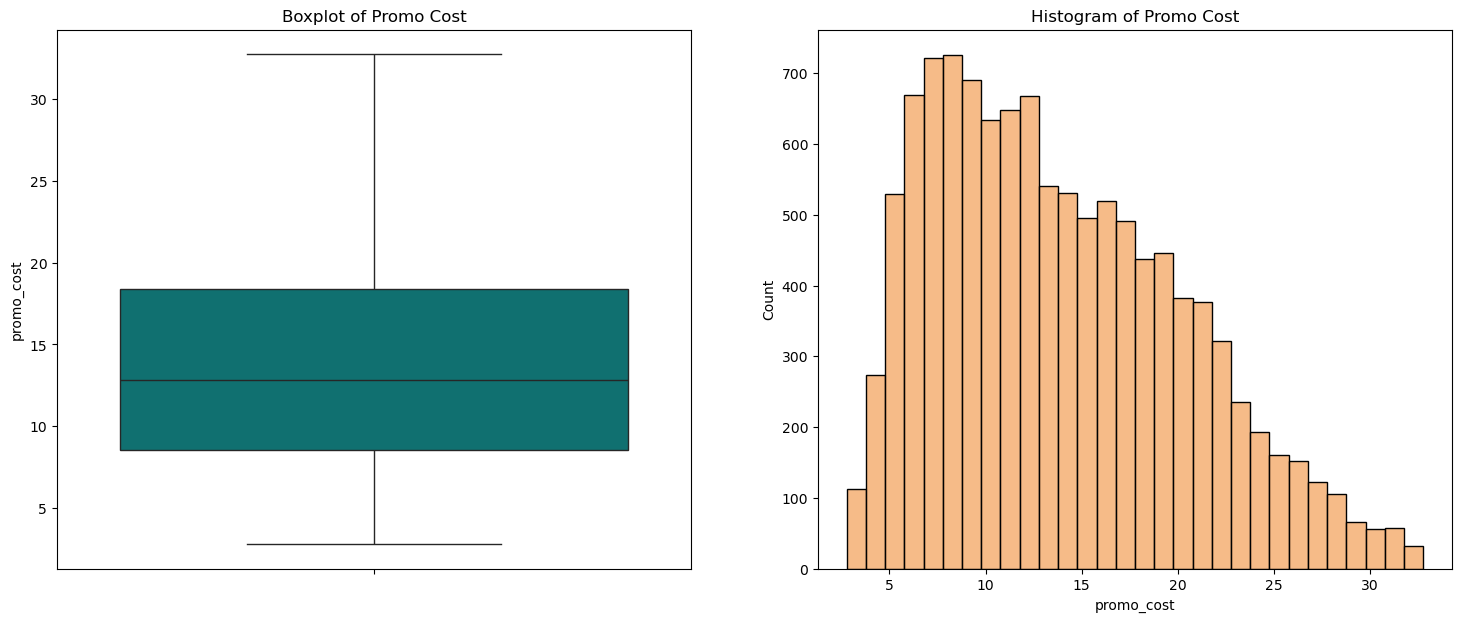

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,7))
ax=ax.flatten()

sns.boxplot(promo_redem_df["promo_cost"], color="teal", ax=ax[0])
ax[0].set_title("Boxplot of Promo Cost")

sns.histplot(promo_redem_df["promo_cost"], color="Sandybrown", bins=30, ax=ax[1])
ax[1].set_title("Histogram of Promo Cost")
plt.show()

In [34]:
trips = trip_df.copy()

customers = cust_df.copy()

activity = cust_act_df.copy()

promotions = promo_df.copy()

promo_redeemed = promo_redem_df.copy()

### Data Quality Check Summary

##### **Trip**
Trip date was formatted to a datetime.
distance_km and duration_min  has a missing value of 3% (3828 out of 127615) and were filled with the median values.ValueError
Few outliers in driver_payout, fare_amount and platform_revenue columns and were overlooked.

##### **Customer**
Sign up date was formatted to a datetime. Few outliers in date_since_last_trip, total_trp and engagement_score columns and were overlooked

##### **Customer Activity**
Event date was formatted to a datetime.

##### **Promo**
Start date and end date were formatted to a datetime. 

##### **Promo Redem**
Redeemed date was formatted to a datetime.

# Exploratory Data Analysis

##### Ensure date columns are datetime

In [35]:
trips["trip_date"] = pd.to_datetime(trips["trip_date"])
customers["signup_date"] = pd.to_datetime(customers["signup_date"])
activity["event_date"] = pd.to_datetime(activity["event_date"])
promotions["start_date"] = pd.to_datetime(promotions["start_date"])
promotions["end_date"] = pd.to_datetime(promotions["end_date"])
promo_redeemed["redeemed_date"] = pd.to_datetime(promo_redeemed["redeemed_date"])

##### Choose a safe snapshot_date (30 days before latest common date)

In [36]:
# Use datasets that represent "behaviour" feeding your prediction features.
latest_common_date = min(
    trips["trip_date"].max(),
    activity["event_date"].max(),
    promo_redeemed["redeemed_date"].max()
)

snapshot_date = latest_common_date - pd.Timedelta(days=30)
print("latest_common_date:", latest_common_date)
print("snapshot_date:", snapshot_date)


latest_common_date: 2025-12-21 00:00:00
snapshot_date: 2025-11-21 00:00:00


##### convert snapshot to date & define recent trips

In [37]:
snapshot_date = pd.to_datetime("2025-11-21")

trips_recent = trips[
    (trips["trip_date"] <= snapshot_date) &
    (trips["trip_date"] >= snapshot_date - pd.Timedelta(days=30))
]

##### Aggregate TRIPS to customer-level features

In [38]:
trip_feats = trips_recent.groupby("customer_id").agg(
    trips_30d=("trip_id", "nunique"),
    completed_trips_30d=("trip_status", lambda s: (s == "completed").sum()),
    cancelled_trips_30d=("trip_status", lambda s: (s == "cancelled").sum()),
    total_fare_30d=("fare_amount", "sum"),
    avg_fare_30d=("fare_amount", "mean"),
    total_distance_30d=("distance_km", "sum"),
    avg_duration_30d=("duration_min", "mean"),
    promo_used_trips_30d=("promo_used", "sum"),
    last_trip_date=("trip_date", "max"),
).reset_index()

trip_feats["recency_days"] = (snapshot_date - trip_feats["last_trip_date"]).dt.days

##### Aggregate ACTIVITY to customer-level features

In [39]:
# Create recent activity window (last 30 days before snapshot_date)
activity_recent = activity[
    (activity["event_date"] <= snapshot_date) &
    (activity["event_date"] >= snapshot_date - pd.Timedelta(days=30))
]

activity_feats = activity_recent.pivot_table(
    index="customer_id",
    columns="event_type",
    values="session_id",
    aggfunc="count",
    fill_value=0
).reset_index()

# total activity events in last 30 days
event_cols = [c for c in activity_feats.columns if c != "customer_id"]
activity_feats["total_events_30d"] = activity_feats[event_cols].sum(axis=1)

##### Merge PROMO_REDEEMED with PROMOTIONS (to know promo attributes)

In [40]:
# Filter to last 30 days before snapshot_date
promo_red_recent = promo_redeemed[
    (promo_redeemed["redeemed_date"] <= snapshot_date) &
    (promo_redeemed["redeemed_date"] >= snapshot_date - pd.Timedelta(days=30))
]

promo_red_feats = promo_red_recent.merge(
    promotions[["promo_id", "promo_type", "discount_value"]],
    on="promo_id",
    how="left"
)

promo_feats = promo_red_feats.groupby("customer_id").agg(
    promos_redeemed_30d=("promo_id", "nunique"),
    promo_cost_30d=("promo_cost", "sum"),
    avg_discount_value_30d=("discount_value", "mean"),
).reset_index()

##### Final merge: start from customers, then left-join features

In [41]:
model_df = customers.copy()

model_df = model_df.merge(trip_feats, on="customer_id", how="left")
model_df = model_df.merge(activity_feats, on="customer_id", how="left")
model_df = model_df.merge(promo_feats, on="customer_id", how="left")

# Fill missing feature values from the merge results(customers with no recent activity)
feature_cols = [c for c in model_df.columns if c not in ["customer_id", "city", "signup_date", "gender", "persona", "signup_channel", "income_level", "churned"]]
model_df[feature_cols] = model_df[feature_cols].fillna(0)

In [42]:
print(model_df.shape)
model_df.head()

(3000, 32)


,customer_id,city,signup_date,age,gender,total_trips,cancelled_trips,days_since_last_trip,churned,engagement_score,...,last_trip_date,recency_days,app_open,ride_completed,ride_request,search,total_events_30d,promos_redeemed_30d,promo_cost_30d,avg_discount_value_30d
0,CUST00000,London,2023-04-04,19,Other,63,7,20,0,1.0,...,0,0.0,31.0,2.0,13.0,16.0,62.0,0.0,0.0,0.0
1,CUST00001,Berlin,2023-01-20,26,Other,45,0,44,0,1.0,...,0,0.0,31.0,3.0,10.0,19.0,63.0,0.0,0.0,0.0
2,CUST00002,Milan,2024-07-03,45,Male,28,1,4,0,1.0,...,0,0.0,31.0,6.0,10.0,17.0,64.0,0.0,0.0,0.0
3,CUST00003,Berlin,2025-03-16,32,Other,54,3,7,0,1.0,...,2025-11-04 00:00:00,17.0,16.0,7.0,6.0,10.0,39.0,0.0,0.0,0.0
4,CUST00004,Milan,2024-04-19,44,Male,24,2,33,0,1.0,...,0,0.0,31.0,8.0,11.0,19.0,69.0,0.0,0.0,0.0


In [43]:
model_df.to_csv("../data/processed/model_df.csv", index=False)

### EDA

In [44]:
model_df.columns

Index(['customer_id', 'city', 'signup_date', 'age', 'gender', 'total_trips',
       'cancelled_trips', 'days_since_last_trip', 'churned',
       'engagement_score', 'loyalty_score', 'persona', 'signup_channel',
       'income_level', 'trips_30d', 'completed_trips_30d',
       'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'promo_used_trips_30d',
       'last_trip_date', 'recency_days', 'app_open', 'ride_completed',
       'ride_request', 'search', 'total_events_30d', 'promos_redeemed_30d',
       'promo_cost_30d', 'avg_discount_value_30d'],
      dtype='object')

In [45]:
model_df["signup_day"] = model_df["signup_date"].dt.day_name()
model_df["signup_month"] = model_df["signup_date"].dt.month_name()
model_df["signup_year"] = model_df["signup_date"].dt.year
model_df["signup_year_month"] = model_df["signup_date"].dt.strftime("%b-%Y")

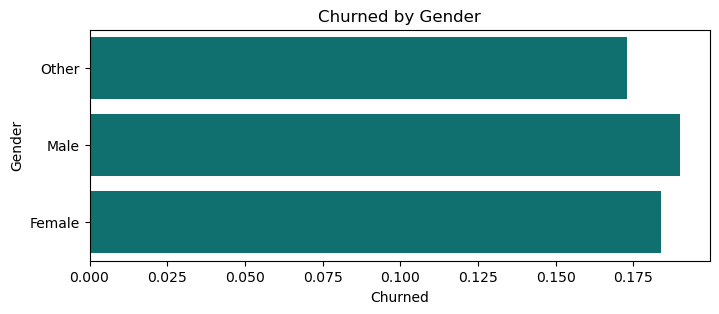

In [46]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", data=model_df, y="gender", color="teal", errorbar=None)
plt.title("Churned by Gender")
plt.xlabel("Churned")
plt.ylabel("Gender")
plt.show()

##### Insight
**churned** happened a lot in **male** gender

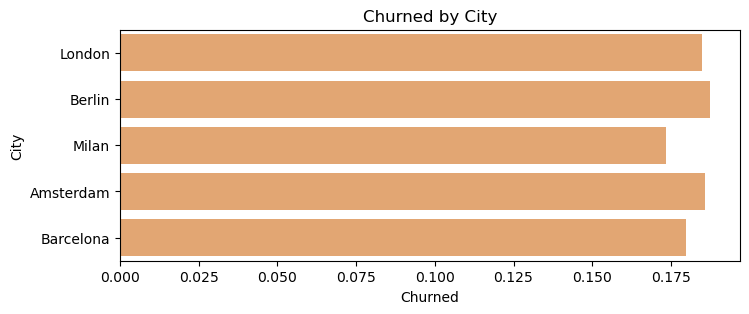

In [47]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", y="city", data=model_df, color="Sandybrown", errorbar=None)
plt.title("Churned by City")
plt.xlabel("Churned")
plt.ylabel("City")
plt.show()

##### Insight
**Berlin** and **Amsterdam** city churned more

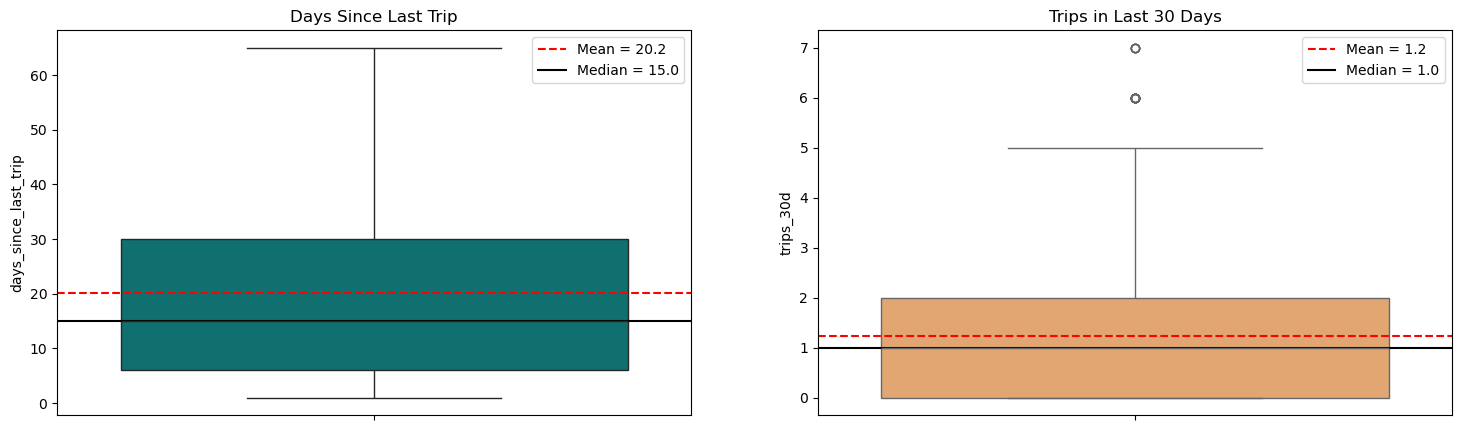

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Days Since Last Trip 
sns.boxplot(y="days_since_last_trip", data=model_df, color="teal", ax=ax[0])

mean_days = model_df["days_since_last_trip"].mean()
median_days = model_df["days_since_last_trip"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Days Since Last Trip")
ax[0].legend()

# Trips in Last 30 Days
sns.boxplot(y="trips_30d", data=model_df, color="sandybrown", ax=ax[1])

mean_trips = model_df["trips_30d"].mean()
median_trips = model_df["trips_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Trips in Last 30 Days")
ax[1].legend()

plt.show()


##### Insight
While the typical customer last used the service about two weeks ago, a smaller but important group has been inactive for much longer, pushing the average to over three weeks.
**Half of customers** took one or fewer trips in the last 30 days while **average customer** took just over one trip in the last month, indicating a low customer engagement.

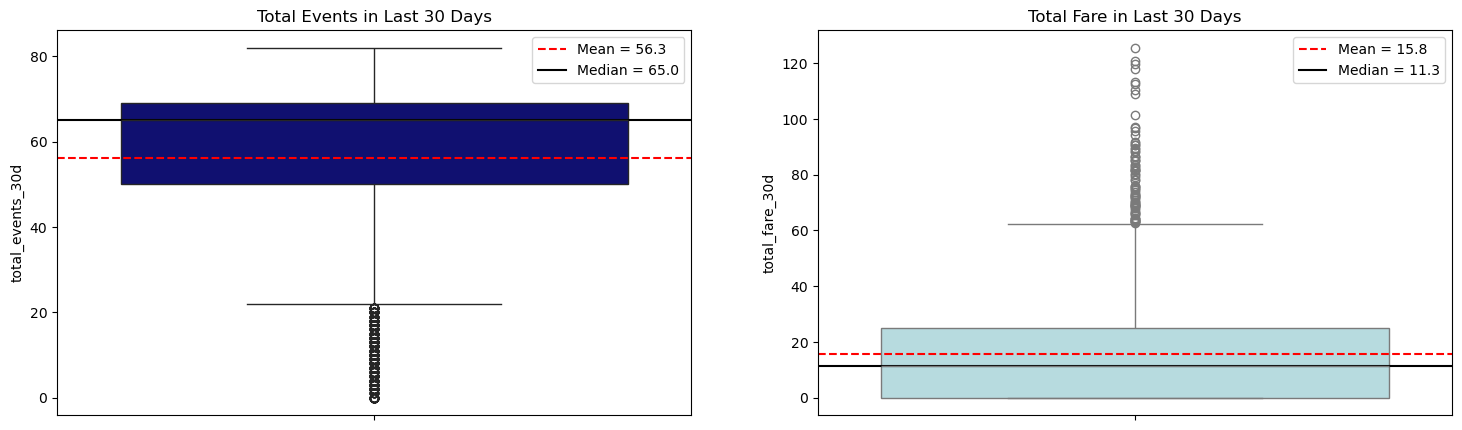

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Total Events in Last 30 Days
sns.boxplot(y="total_events_30d", data=model_df, color="navy", ax=ax[0])

mean_days = model_df["total_events_30d"].mean()
median_days = model_df["total_events_30d"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Total Events in Last 30 Days")
ax[0].legend()


# Total Fare in Last 30 Days
sns.boxplot(y="total_fare_30d", data=model_df, color="powderblue", ax=ax[1])

mean_trips = model_df["total_fare_30d"].mean()
median_trips = model_df["total_fare_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Total Fare in Last 30 Days")
ax[1].legend()

plt.show()

##### Insight
Most customers interact with the app frequently, but a smaller group shows minimal activity, lowering the average.
While the typical customer spends just over £11 per month, a smaller group of high-value users significantly increases average revenue, making their retention strategically important.

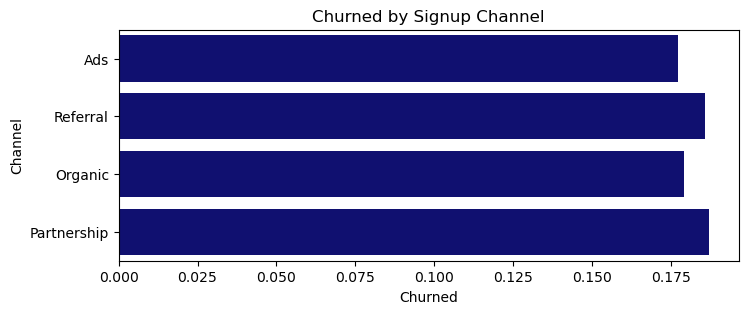

In [50]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", y="signup_channel", data=model_df, color="navy", errorbar=None)
plt.title("Churned by Signup Channel")
plt.xlabel("Churned")
plt.ylabel("Channel")
plt.show()

##### Insight
Customer signed in via **Partnership and Referral channel** churned more

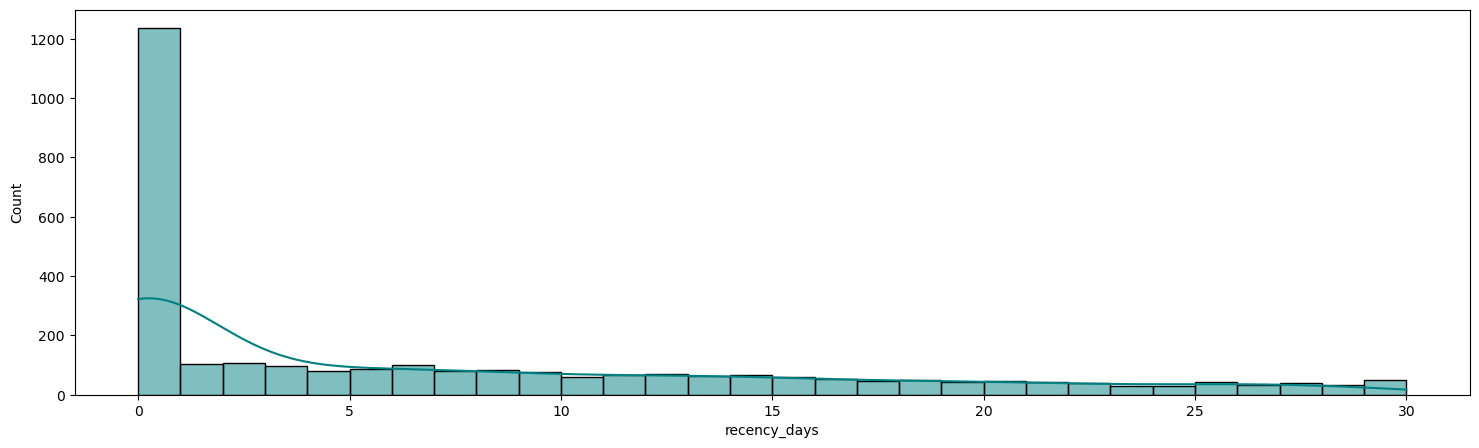

In [51]:
plt.figure(figsize=(18,5))
sns.histplot(x="recency_days", data=model_df, color="teal", bins=30, kde=True)
plt.show()

##### Insight
The recency distribution is heavily right-skewed, with most customers most customers are still actively using the service, but a smaller group has not used it for several weeks. These inactive customers represent the highest churn risk and should be prioritised for retention efforts.

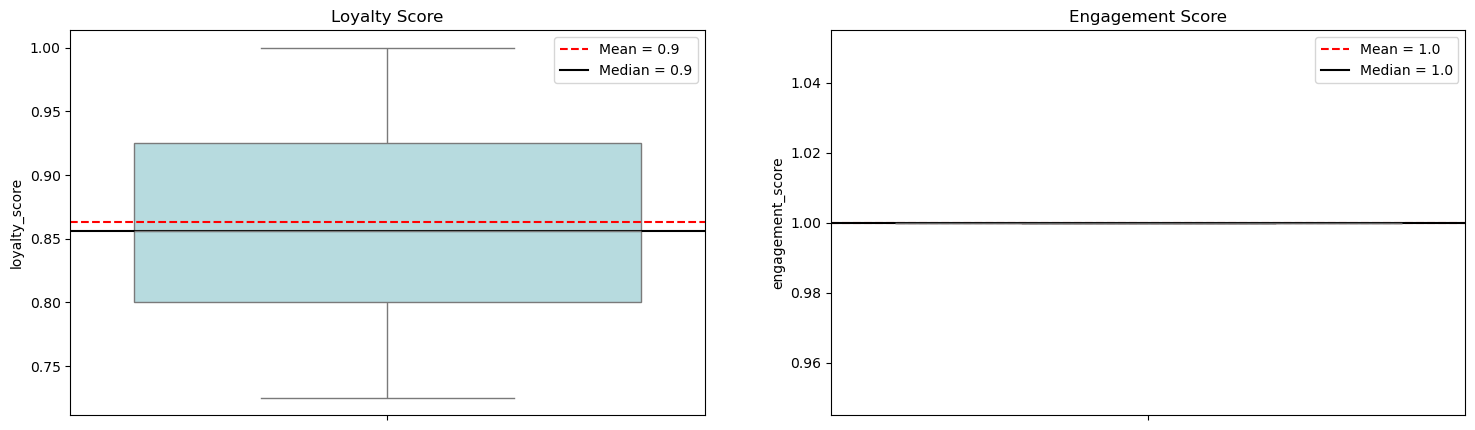

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Loyalty Score
sns.boxplot(y="loyalty_score", data=model_df, color="powderblue", ax=ax[0])

mean_days = model_df["loyalty_score"].mean()
median_days = model_df["loyalty_score"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Loyalty Score")
ax[0].legend()

# Engagement Score
sns.boxplot(y="engagement_score", data=model_df, color="sandybrown", ax=ax[1])

mean_trips = model_df["engagement_score"].mean()
median_trips = model_df["engagement_score"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Engagement Score")
ax[1].legend()

plt.show()

##### Insight
Most customers show strong loyalty, but a smaller subset has significantly lower loyalty scores, indicating higher churn risk.
The engagement score is capped at its maximum for most users, making it difficult to distinguish between active and at-risk customers.

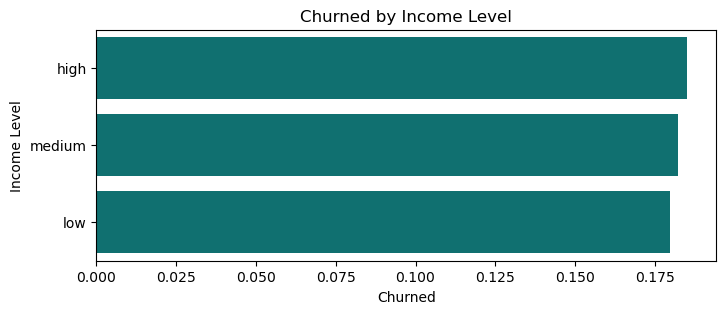

In [53]:
plt.figure(figsize=(8,3))
sns.barplot(x="churned", y="income_level", data=model_df, color="teal", errorbar=None)
plt.title("Churned by Income Level")
plt.xlabel("Churned")
plt.ylabel("Income Level")
plt.show()

##### Insight
High income group churn more.

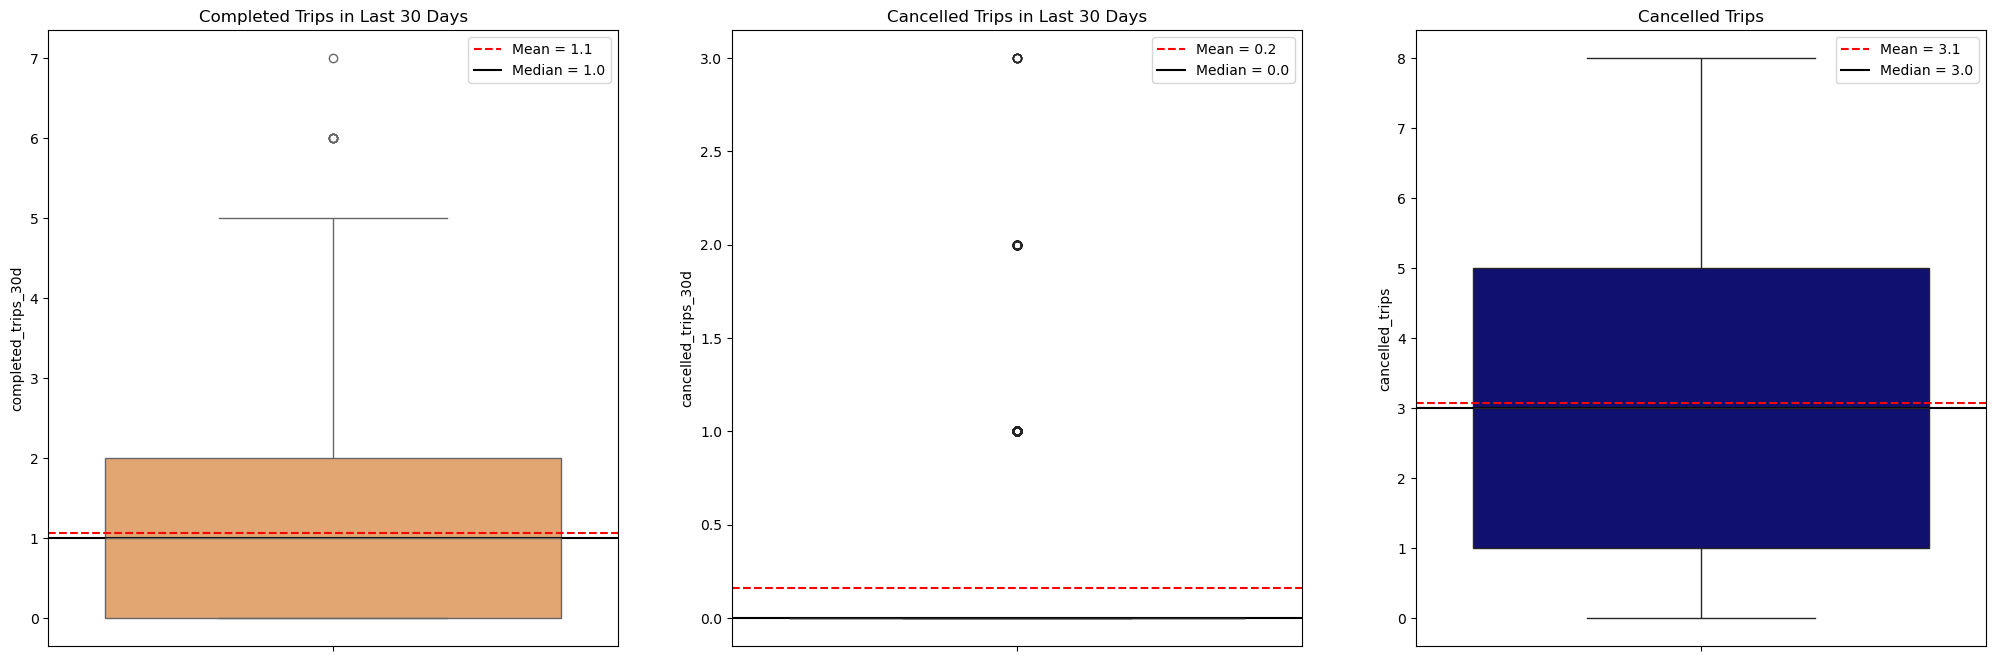

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
ax = ax.flatten()

# Completed Trips in Last 30 Days
sns.boxplot(y="completed_trips_30d", data=model_df, color="sandybrown", ax=ax[0])

mean_days = model_df["completed_trips_30d"].mean()
median_days = model_df["completed_trips_30d"].median()

ax[0].axhline(mean_days, color="red", linestyle="--", label=f"Mean = {mean_days:.1f}")
ax[0].axhline(median_days, color="black", linestyle="-", label=f"Median = {median_days:.1f}")

ax[0].set_title("Completed Trips in Last 30 Days")
ax[0].legend()

# Canceled Trips in Last 30 Days
sns.boxplot(y="cancelled_trips_30d", data=model_df, color="teal", ax=ax[1])

mean_trips = model_df["cancelled_trips_30d"].mean()
median_trips = model_df["cancelled_trips_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Cancelled Trips in Last 30 Days")
ax[1].legend()

# Canceled Trips 
sns.boxplot(y="cancelled_trips", data=model_df, color="navy", ax=ax[2])

mean_trips = model_df["cancelled_trips"].mean()
median_trips = model_df["cancelled_trips"].median()

ax[2].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[2].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[2].set_title("Cancelled Trips")
ax[2].legend()


plt.show()

##### Insight
While engagement and loyalty scores remain high, actual ride usage is low, suggesting many customers are still interacting with the app but not converting into completed trips. This indicates early-stage disengagement rather than full churn.

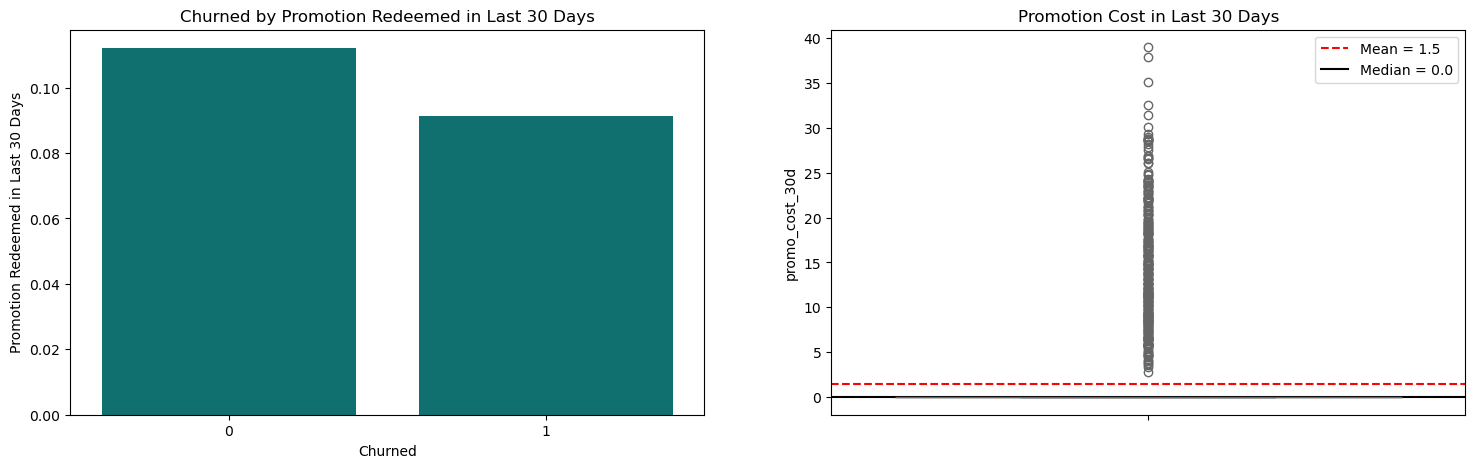

In [55]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax = ax.flatten()

# Promotion Redeemed in Last 30 Days
sns.barplot(x="churned", y="promos_redeemed_30d", data=model_df, color="teal", errorbar=None, ax=ax[0])
ax[0].set_title("Churned by Promotion Redeemed in Last 30 Days")
ax[0].set_xlabel("Churned")
ax[0].set_ylabel("Promotion Redeemed in Last 30 Days")

# Promotion Cost in Last 30 Days
sns.boxplot(y="promo_cost_30d", data=model_df, color="sandybrown", ax=ax[1])

mean_trips = model_df["promo_cost_30d"].mean()
median_trips = model_df["promo_cost_30d"].median()

ax[1].axhline(mean_trips, color="red", linestyle="--", label=f"Mean = {mean_trips:.1f}")
ax[1].axhline(median_trips, color="black", linestyle="-", label=f"Median = {median_trips:.1f}")

ax[1].set_title("Promotion Cost in Last 30 Days")
ax[1].legend()

plt.show()

##### Insight
Promotions redeemed in the last 30 days are only slightly lower for churned customers, suggesting promotions have a limited impact on preventing churn.
At the same time,the business is spending disproportionately more promotions on a small subset of customers.